# Applied Data Science Project Milestone 1

**Team 1:** Indira Aitkulova, Antonio Azevedo, Alex Chae, Ashley Nguyen

**Dataset**: Traffic Crash 

In this Jupyter Notebook, we would like to walk you through our way of exploring and cleaning the data. We would like to investigate traffic crash trends and the forces behind them from 2015 to the present. 

## Obtaining The Data
Our group has chosen to work with one of the provided datasets. Therefore, we downloaded the necessary files from the Brightspace learning management system. Overall, we downloaded 6 files and 4 of them are particular interest for us: 
*  "README_Crash Dataset.docx" - README file that contains information about the dataset
*  "Traffic_Crashes_-_Crashes" - Crash data shows information about each traffic crash on city streets within the City of Chicago limits and under the jurisdiction of Chicago Police Department (CPD). Data are shown as is from the electronic crash reporting system (E-Crash) at CPD, excluding any personally identifiable information. 
*  "Traffic_Crashes_-_People" - This data contains information about people involved in a crash and if any injuries were sustained. 
*  "Traffic_Crashes_-_Vehicles" - This dataset contains information about vehicles (or units as they are identified in crash reports) involved in a traffic crash. 

## Reading The Data
Before exploring and manipulating data in Python, it needs to be loaded first. Nevertheless, since Google Colab runs all code on an external server, files must be manually uploaded to that server before they can be accessed.

To simplify the process, the recommended approach in Google Colab is to upload the data to Google Drive and import it from there. 

The dataset we are interested in consists of 3 csv files (Traffic_Crashes_-_Crashes.csv, Traffic_Crashes_-_People.csv, and Traffic_Crashes_-_Vehicles.csv). In this section we download all of them. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/My\ Drive/Colab\ Notebooks/Applied\ Data\ Science/Project #lists the files and directories in the folder

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Traffic Crash'


Also, to ensure further cleaning and data exploration to go smoothly, we need to upload some libraries

In [ ]:
# Import necessary libraries

import numpy as np
import pandas as pd
import datetime
import os
import random

To simplify the process of accessing and reading the data for everyone in the group, we have listed the input paths corresponding to the directories where the files are stored for each teammate.

In [ ]:
#Input pathes
#input_path = '/content/drive/My Drive/Colab Notebooks/Applied Data Science/Project/Traffic Crash/'#Indira
#input_path = '/content/drive/MyDrive/EY 2022-2023 Junior/Spring 2023/SOCSC-UH 2214 Applied Data Science/project/Traffic Crash/' #Ashley
input_path = '/content/drive/MyDrive/Junior Spring/Applied Data Science/Project/Traffic Crash/' #Alex
# input_path = '/content/drive/MyDrive/Applied Data Science/Project/Traffic Crash/'  #Antonio

In [ ]:
# To read a file, we first load it into a Pandas DataFrame 
# We use , low_memory=False to prevent Pandas from reading the file in chunks and trying to infer the data types.
import pandas as pd
crashes = pd.read_csv(input_path + 'Traffic_Crashes_-_Crashes.csv', low_memory=False)
vehicles = pd.read_csv(input_path + 'Traffic_Crashes_-_Vehicles.csv', low_memory=False)
people = pd.read_csv(input_path + 'Traffic_Crashes_-_People.csv', low_memory=False)

FileNotFoundError: ignored

To further investigate the three datasets, we look at the columns available. We will use this information further to determine problems and hypothesis.

In [ ]:
crashes_cols = list(crashes.columns)
people_cols = list(people.columns)
vehicles_cols = list(vehicles.columns)
#To get unique columns across all 3 datasets
available_cols = crashes_cols + list(set(people_cols + vehicles_cols) - set(crashes_cols))
available_cols

## Problem Statement & Hypothesis
Identifying problems is a crucial first step in data analysis, as it helps to focus the analysis on specific areas that need improvement. Once problems are identified, hypotheses can be formulated to test potential solutions or explanations for the problems observed in the data.Hypothesis formulation is an essential part of data analysis, as it provides a clear direction for further exploration and helps to avoid irrelevant or tangential analyses that do not address the underlying problems.

### Problem Statement 
We are working with the “Traffic Crash” dataset and therefore, we would like to investigate the relationship between some of the factors related to external conditions, drivers and vehicles, crashes and injuries. In particular, we would like to explore the role of traffic control devices, weather condition, lightning condition, drivers' sex and age, and vehicle types in causing car crashes and predicting injuries and crash type. Moreover, we want to investigate the trends related crashes and injuries across years (2015-2023). 


### Hypothesis
Based on the problems that our group aim to investigate, the hypothesis we target to test are the following:
*  Bad weather conditions might be associated with higher number of crashes, higher number of crashes that involve injuries, more severe injuries and higher number of injuries;
*  Bad lighting conditions might be associated with higher number of crashes, higher number of crashes that involve injuries, more severe injuries and higher number of injuries;
*  Bad device conditions might be associated with higher number of crashes, higher number of crashes that involve injuries, more severe injuries and higher number of injuries;
*  Driver's sex might not influence number of crashes, number of crashes that involve injuries, severity of injuries and number of injuries;
*  Drivers who are young and old might cause higher number of crashes, higher number of crashes that involve injuries, more intense severity of injuries and higher number of injuries;
*  Older vehicles might cause higher number of crashes, higher number of crashes that involve injuries, more intense severity of injuries and higher number of injuries;
*  Number of crashes should remain relatively consistent throughtout the years (possibly the numbers were lower during 2019 due to the start of the pandemic).


## Irrelevant Data
In this section, we would like to work with the datasets to further explore the problem and hypothesis and include the variables that are necessary for the further analysis and data cleaning

In [ ]:
crashes.head(2)

In [ ]:
people.head(2)

In [ ]:
vehicles.head(2)

The three data files include various columnns about the details of car crashes in Chicago, Illinois. The first csv file, Crashes, contains information about the car crash itself, the second file, people, contains information about the drivers and passengers involved in the car crash, and the last tile, vehicles, contain information about the vehicles involed in the crash. 

While the files contain many columns, we will only use some of the columns that are relevant to the scope of our problem statement. Below are the columns that we decided to keep. Information about each column can be found [here](https://docs.google.com/document/d/12f-XbybhaFxzG7a5MYqPNiRkeU6Km4teEMaxYm0cOpA/edit). 

1st csv file (Crashes) : CRASH_RECORD_ID, CRASH_DATE, device_condition, weather_condition, lighting_condition, crash_type, damage, injuries_total, injuries_fatal, injuries_incapacitating, injuries_non_incapacitating, injuries_reported_not_evident, injuries_no_indication, injuries_unknown

2nd csv file (People) : person_id, crash_record_id, sex, age, safety equipment, airbag_deployed, injury_classification

3rd csv file (Vehicle) : vehicle_id, crash_record_id, make, model, vehicle_year, vehicle_type

In [ ]:
# Keep only the columns related to the problem statement

crashes = crashes.loc[:, ['CRASH_RECORD_ID', 'CRASH_DATE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'CRASH_TYPE', 'DAMAGE', 'INJURIES_TOTAL','INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN']]
people = people.loc[:, ['PERSON_ID','PERSON_TYPE', 'CRASH_RECORD_ID', 'SEX', 'AGE', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'INJURY_CLASSIFICATION']]
vehicles = vehicles.loc[:, ['VEHICLE_ID', 'CRASH_RECORD_ID', 'MAKE', 'MODEL', 'VEHICLE_YEAR', 'VEHICLE_TYPE']]

## Merging The Data
Next, we want to merge the three datasets for convenience and further analysis. 

According to the ReadMe file, CRASH_RECORD_ID is the column that the datasets should be merged on as it says "The dataset contains three data files containing information about the vehicle, people, and the crash linked together by a “CRASH_RECORD_ID” field."

Using an outer join ensures that all records from all three data frames are included in the resulting DataFrame, even if some records are missing in one or more of the original data frames. Some data may be missing or incomplete, but we still want to include as much information as possible in our analysis. After merging, we save the merged file as a separate csv file for convenience.

In [ ]:
# Merging 3 dataframes by the CRASH_RECORD_ID column
merged_df = pd.merge(pd.merge(crashes, people, on='CRASH_RECORD_ID', how='outer'), vehicles, on='CRASH_RECORD_ID', how='outer')

In [ ]:
# Define the output directory and file name
output_directory = "/ADS_Milestone1/"
filename = 'merged.csv'

# Create the directory if it does not exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Save the DataFrame as a CSV file
merged_df.to_csv("/content/drive/MyDrive/ADS_Milestone1/merged.csv", index=False)


## Studying the Data
In this section, we want to take a look at data to spot some red flags. 

To simplify the process of accessing and reading the merged data for everyone in the group, we have listed the merged paths corresponding to the directories where the merged file is stored for each teammate.




In [ ]:
merged_path = '/content/drive/MyDrive/ADS_Milestone1/merged.csv' #Indira's
# merged_path = '/content/drive/MyDrive/Applied Data Science/Project/merged.csv' # Antonio's
# merged_path = '/content/drive/MyDrive/Junior Spring/Applied Data Science/Project/merged.csv' # Alex's

In [ ]:
# Load the merged csv file 
merged_df = pd.read_csv(merged_path)

In [ ]:
print(merged_df.shape)
merged_df.head()

(3207809, 26)


,CRASH_RECORD_ID,CRASH_DATE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,CRASH_TYPE,DAMAGE,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,...,SEX,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,INJURY_CLASSIFICATION,VEHICLE_ID,MAKE,MODEL,VEHICLE_YEAR,VEHICLE_TYPE
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,03/25/2019 02:43:00 PM,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",1.0,0.0,0.0,...,F,27.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,582401.0,CHEVROLET,CRUZE,2017.0,PASSENGER
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,03/25/2019 02:43:00 PM,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",1.0,0.0,0.0,...,F,27.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,582411.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2010.0,PASSENGER
2,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,03/25/2019 02:43:00 PM,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",1.0,0.0,0.0,...,F,22.0,SAFETY BELT USED,DID NOT DEPLOY,"REPORTED, NOT EVIDENT",582401.0,CHEVROLET,CRUZE,2017.0,PASSENGER
3,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,03/25/2019 02:43:00 PM,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",1.0,0.0,0.0,...,F,22.0,SAFETY BELT USED,DID NOT DEPLOY,"REPORTED, NOT EVIDENT",582411.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2010.0,PASSENGER
4,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,03/25/2019 02:43:00 PM,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",1.0,0.0,0.0,...,M,56.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,582401.0,CHEVROLET,CRUZE,2017.0,PASSENGER


Our dataframe has 3207809 rows. 

##Cleaning the data

### Duplicates

First, we will check if there are duplicate rows that represent the same car crash accident. We will do so with the `CRASH_RECORD_ID` column, because the each value in this column must represent only one car crash incident. 

In [ ]:
unique_len = len(merged_df["CRASH_RECORD_ID"].unique())
entire_len = len(merged_df["CRASH_RECORD_ID"])

print(unique_len, entire_len)
print(unique_len == entire_len)

697588 3207809
False


With the above, code, we see that there are 2,510,221 duplicate rows in our data. However, before deciding whether to remove the duplicates, we will confirm that the duplicated rows are in fact exactly the same. If the `CRASH_RECORD_ID` is the same, columns that represent details about the crash have to be the same as well. Hence, we will see if columns representing people and vehicles are the same as well. 

In [ ]:
# we use a portion of the dataframe for this comparison. 
merged_df[['CRASH_RECORD_ID','SEX', 'AGE']].set_index("CRASH_RECORD_ID").head(10)

From inspection, we see that not all the rows are exactly the same. For example, for the first `CRASH_RECORD_ID` shown above, there are 6 rows. But 4 of them have 'F' in `SEX` while 2 of them have 'M'. As such, we can infer that some rows share a `CRASH_RECORD_ID` but represent different people involved in the accident. Hence, we cannot drop all the duplicates of `CRASH_RECORD_ID`. 

In [ ]:
merged_df[merged_df.duplicated()]

From the above code, we see that nonetheless, 5359 rows are the exact same rows. So we will remove these from the data frame. Now, we have 3,202,450 unique rows in our dataframe. 

In [ ]:
merged_df = merged_df[~merged_df.duplicated()]
merged_df.shape

### Type Conversion

In our dataset, there are two columns which represent a date. `CRASH_DATE` represents the time of the car crash and `VEHICLE_YEAR` represents the year in which the vehicle was made. 

In [ ]:
merged_df['CRASH_DATE']

In [ ]:
merged_df['VEHICLE_YEAR']

However, the above inspections show that both columns have the datatypes object and float, respectively. We will first convert the data types to datetime. 

In [ ]:
merged_df["CRASH_DATE"]=pd.to_datetime(merged_df["CRASH_DATE"], errors= 'ignore')
merged_df["VEHICLE_YEAR"]=pd.to_datetime(merged_df["VEHICLE_YEAR"], errors= 'ignore')

Now, we can verify that both columns are in datetime type. 

In [ ]:
merged_df[['CRASH_DATE', 'VEHICLE_YEAR']].dtypes

In [ ]:
merged_df.dtypes

Other columns do not seem to require type conversion. 

### Missing Values


#### Missing values to None type

By inspecting each column, we will check which column contains missing values. 

In [ ]:
merged_df['DEVICE_CONDITION'].value_counts()

In [ ]:
merged_df['WEATHER_CONDITION'].value_counts()

In [ ]:
merged_df['LIGHTING_CONDITION'].value_counts()

In [ ]:
merged_df['SAFETY_EQUIPMENT'].value_counts()

In [ ]:
merged_df['AIRBAG_DEPLOYED'].value_counts()

We noticed that some of the values were recorded as string values such as "UNKNOWN" or "MISSING", when they do not contain any useful information. We will change these values to `None` so that it is easier to deal with missing values during the analysis. 

In [ ]:
merged_df.loc[merged_df["DEVICE_CONDITION"] == "UNKNOWN", "DEVICE_CONDITION"] = None
merged_df.loc[merged_df["DEVICE_CONDITION"] == "MISSING", "DEVICE_CONDITION"] = None
merged_df.loc[merged_df["WEATHER_CONDITION"] == "UNKNOWN", "WEATHER_CONDITION"] = None
merged_df.loc[merged_df["LIGHTING_CONDITION"] == "UNKNOWN", "LIGHTING_CONDITION"] = None
merged_df.loc[merged_df["SAFETY_EQUIPMENT"] == "USAGE UNKNOWN", "SAFETY_EQUIPMENT"] = None
merged_df.loc[merged_df["AIRBAG_DEPLOYED"] == "DEPLOYMENT UNKNOWN", "AIRBAG_DEPLOYED"] = None
merged_df.loc[merged_df["AIRBAG_DEPLOYED"] == "NOT APPLICABLE", "AIRBAG_DEPLOYED"] = None

And below, we verify the results. 

In [ ]:
(merged_df['DEVICE_CONDITION'] == 'UNKNOWN').value_counts()

In [ ]:
(merged_df['DEVICE_CONDITION'] == 'MISSING').value_counts()

In [ ]:
(merged_df['WEATHER_CONDITION'] == 'UNKNOWN').value_counts()

In [ ]:
(merged_df['LIGHTING_CONDITION'] == 'UNKNOWN').value_counts()

In [ ]:
(merged_df['SAFETY_EQUIPMENT'] == "USAGE UNKNOWN").value_counts()

In [ ]:
(merged_df['AIRBAG_DEPLOYED'] == "DEPLOYMENT UNKNOWN").value_counts()

In [ ]:
(merged_df['AIRBAG_DEPLOYED'] == "NOT APPLICABLE").value_counts()

We further inspect other columns. 

In [ ]:
merged_df['CRASH_TYPE'].value_counts()

In [ ]:
merged_df['DAMAGE'].value_counts()

In [ ]:
merged_df['INJURIES_TOTAL'].value_counts()

In [ ]:
merged_df['SEX'].value_counts()

In [ ]:
merged_df['PERSON_TYPE'].value_counts()

The above 5 columns do not seem to contain missing information. 

In [ ]:
merged_df['AGE'].value_counts()

However, the `AGE` column has some values that are below 0. Hence, we will change these values to `None`.

In [ ]:
merged_df.loc[merged_df["AGE"] < 0, "AGE"] = None

We verify the result below by checking that the minimum value of the `AGE` column is equal to or greater than 0. 

In [ ]:
merged_df['AGE'].describe()

Moreover, in Chicago, we know that the driving age is 16. Hence, we will examine the data to see if the people in our dataset who are drivers were at least 16-years-old. 

In [ ]:
merged_df[merged_df['PERSON_TYPE'] == 'DRIVER']['AGE'].describe()

count    1.822697e+06
mean     3.996298e+01
std      1.581157e+01
min     -1.770000e+02
25%      2.700000e+01
50%      3.700000e+01
75%      5.100000e+01
max      1.100000e+02
Name: AGE, dtype: float64

We see above that the minimum value is 0, while the first quartile is 27 years old for the `AGE` column. Hence, there may be age values below 16 in the first quartile. 

In [ ]:
merged_df[merged_df['PERSON_TYPE'] == 'DRIVER'][merged_df['AGE'] < 16]['AGE'].describe()

<ipython-input-52-1f5444baebec>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merged_df[merged_df['PERSON_TYPE'] == 'DRIVER'][merged_df['AGE'] < 16]['AGE'].describe()


count    19248.000000
mean         1.141469
std          4.673036
min       -177.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: AGE, dtype: float64

In [ ]:
len(merged_df[merged_df['PERSON_TYPE'] == 'DRIVER'][merged_df['AGE'] < 16]['AGE'])

<ipython-input-53-1ee959703ce1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(merged_df[merged_df['PERSON_TYPE'] == 'DRIVER'][merged_df['AGE'] < 16]['AGE'])


19248

In [ ]:
len(merged_df[merged_df['PERSON_TYPE'] == 'DRIVER'][(merged_df['AGE'] < 16) & (merged_df['AGE'] > 0) ]['AGE'])

<ipython-input-54-eb8083654a49>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(merged_df[merged_df['PERSON_TYPE'] == 'DRIVER'][(merged_df['AGE'] < 16) & (merged_df['AGE'] > 0) ]['AGE'])


2102

Here, we see that there are 19235 rows in which the driver's age is below 16. Out of these rows, 2102 are ages above 0 and the rest are 0. Through common sense, we know that a driver's age cannot be 0. As more 75% of the 19235 rows here have the value 0, we decided to remove these rows from the dataset, as it might distort the `AGE` variable. 

In [ ]:
merged_df.shape

(2523967, 26)

In [ ]:
merged_df = merged_df[((merged_df['AGE'] >= 16) & (merged_df['PERSON_TYPE'] == 'DRIVER')) | (merged_df['PERSON_TYPE'] != 'DRIVER')]
merged_df.shape

(2523967, 26)

Lastly, we have two more columns that describe vehicles, which are `MAKE` and `MODEL`. Upon inspection, we see that there are some values that are meaningless. 

In [ ]:
merged_df['MAKE'].unique()[:100]

array(['CHEVROLET', 'TOYOTA MOTOR COMPANY, LTD.', 'HYUNDAI',
       'GENERAL MOTORS CORPORATION (GMC)', 'NISSAN', 'UNKNOWN', 'DODGE',
       'HONDA', 'MAZDA', 'FORD', 'TOYOTA', nan,
       'FREIGHTLINER CORPORATION', 'LEXUS', 'ISUZU', 'JEEP', 'AUDI',
       'HYSTER CORPORATION', 'SUBARU', 'CADILLAC', 'MITSUBISHI', 'SCION',
       'KIA', 'INFINITI', 'LINCOLN-CONTINENTAL', 'MERCEDES-BENZ',
       'BLUE BIRD BODY COMPANY', 'VOLVO', 'VOLKSWAGEN', 'PONTIAC',
       'PORSCHE', 'ELGIN SWEEPER COMPANY. ELGIN, IL', 'CHRYSLER', 'BMW',
       'ACURA', 'GENERAL MOTORS CORP.', 'KIA MOTORS CORP',
       'PETERBILT MOTORS CO., DIVISION PACCAR, INC.',
       'SPARTAN MOTORS, INC. (CHARLOTTE, MI)', 'BUICK', 'MERCURY',
       'LAND ROVER', 'SATURN', 'BIG TEX', 'NEW FLYER', 'LINCOLN',
       'INTERNATIONAL TRAILER CORPORATION', 'THOMAS BUILT BUS COMPANY',
       'PLYMOUTH', 'FREIGHTLINER CORP.', 'JAGUAR', 'HARLEY-DAVIDSON',
       'CENTURION INTERNATIONAL, INC. (WACO, TX)',
       'SPARTAN MOTORS, INC. (

In [ ]:
merged_df['MAKE'].unique()[101:]

array(['GREAT DANE TRAILERS INC.',
       'CALDWELL (DIVISION OF SMITH INTERNATIONAL, INC.)', 'DAIMLER', ...,
       'VACATIONAR MOTOR HOME TRUCK', 'BALDWIN ENTERPRISES',
       'ABC COACH COMPANY (FROM 1960 ON SEE VOUGHT INDUSTRIES)'],
      dtype=object)

In [ ]:
merged_df['MODEL'].unique()[:100]

array(['CRUZE', 'CAMRY', '4RUNNER', 'OTHER (EXPLAIN IN NARRATIVE)',
       'ALTIMA', 'JOURNEY', 'HR-V', 'UNKNOWN', 'TAURUS', 'RAV4', 'CIVIC',
       'SENTRA', 'Tundra', 'ACCORD', 'SILVERADO', 'S10', nan,
       'FREIGHTLINER CORP.', 'RX330', 'TRUCK', 'PALISADE', 'ES350',
       'PILOT', 'JEEP', 'A4', 'ESCAPE', 'HYSTER CORP.', 'MALIBU', 'CRV',
       'Murano', 'COROLLA', 'FORESTER', 'Escalade', 'LANCER', 'CHARGER',
       'XB', 'ELANTRA', 'RAM 1500 PU', 'CR-V', 'SORENTO', 'Pathfinder',
       'EDGE', 'SONATA', 'STRATUS', 'NAVIGATOR', 'IMPALA', 'VERSA',
       'BLUE BIRD BODY CO.', 'TRAIL BLAZER', 'ODYSSEY', 'XC60', 'EQUINOX',
       'CARAVAN', 'ACCENT', 'TOYOTA', 'FUSION', 'ROGUE', 'TUCSON',
       'FORD-TRUCK,VAN,SUV, ETC', 'YARIS', 'PASSAT', 'VELOSTAR',
       'EXPLORER', 'SELTOS', 'JETTA', 'CTS', 'CHEROKEE', 'Focus',
       'MONTANA', 'TRAX', 'NISSAN MAXIMA', 'Avenger',
       'ELGIN SWEEPER COMPANY. ELGIN, IL', 'Express (full-size van)',
       'ECLIPSE', 'Prius', 'ENCLOSED BODY', '

In [ ]:
merged_df['MODEL'].unique()[101:]

array(['TORRENT', 'MOTORIZED', 'SANTA FE', ..., 'TRANSMOBLIE TRAILER',
       'VACATIONAR MOTOR HOME TRUCK', 'BALDWIN ENTERPRISES'], dtype=object)

Upon inspection, I found that these two columns also contain string values that are meaningless. 

In [ ]:
merged_df.loc[merged_df["MAKE"] == "UNKNOWN", "MAKE"] = None
merged_df.loc[merged_df["MODEL"] == "UNKNOWN", "MODEL"] = None
merged_df.loc[merged_df["MODEL"] == "OTHER (EXPLAIN IN NARRATIVE)", "MODEL"] = None

While we retaining the two columns, we will create another column called `MAKE_MODEL` which concatenates both columns, as we generally refer to cars with both the make and the model. 

In [ ]:
merged_df['MAKE_MODEL'] = merged_df['MAKE'] + " " + merged_df['MODEL']

<ipython-input-33-2bcddf1f361c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['MAKE_MODEL'] = merged_df['MAKE'] + " " + merged_df['MODEL']


In [ ]:
merged_df[['MAKE', 'MODEL', 'MAKE_MODEL']].head()

,MAKE,MODEL,MAKE_MODEL
0,CHEVROLET,CRUZE,CHEVROLET CRUZE
1,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,"TOYOTA MOTOR COMPANY, LTD. CAMRY"
2,CHEVROLET,CRUZE,CHEVROLET CRUZE
3,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,"TOYOTA MOTOR COMPANY, LTD. CAMRY"
4,CHEVROLET,CRUZE,CHEVROLET CRUZE


So until this step, we have quickly inspect each of the columns in our dataframe and replaced all meaningless string values with `None`. The current dataframe looks like the following. 

In [ ]:
merged_df.head(2)

,CRASH_RECORD_ID,CRASH_DATE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,CRASH_TYPE,DAMAGE,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,...,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,INJURY_CLASSIFICATION,VEHICLE_ID,MAKE,MODEL,VEHICLE_YEAR,VEHICLE_TYPE,MAKE_MODEL
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019-03-25 14:43:00,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",1.0,0.0,0.0,...,27.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,582401.0,CHEVROLET,CRUZE,1970-01-01 00:00:00.000002017,PASSENGER,CHEVROLET CRUZE
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019-03-25 14:43:00,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",1.0,0.0,0.0,...,27.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,582411.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,1970-01-01 00:00:00.000002010,PASSENGER,"TOYOTA MOTOR COMPANY, LTD. CAMRY"


#### Eliminating missing values

At this stage, we will inspect whether all of the columns in the dataframe are in fact useful. 

Below is a sorted dictionary that shows the number of missing values in each column. 

In [ ]:
cols = list(merged_df.columns)

num_na = {}

for c in cols:
  num_na[c] = merged_df[c].isna().sum()

In [ ]:
sorted(num_na.items(), key = lambda x: x[1], reverse = True)

[('SAFETY_EQUIPMENT', 1482077),
 ('AIRBAG_DEPLOYED', 1280575),
 ('AGE', 927079),
 ('MAKE_MODEL', 688742),
 ('MODEL', 655162),
 ('VEHICLE_YEAR', 498298),
 ('MAKE', 306905),
 ('DEVICE_CONDITION', 185438),
 ('WEATHER_CONDITION', 119027),
 ('LIGHTING_CONDITION', 90996),
 ('VEHICLE_ID', 68785),
 ('VEHICLE_TYPE', 68785),
 ('SEX', 53357),
 ('INJURY_CLASSIFICATION', 4148),
 ('INJURIES_TOTAL', 2674),
 ('INJURIES_FATAL', 2674),
 ('INJURIES_INCAPACITATING', 2674),
 ('INJURIES_NON_INCAPACITATING', 2674),
 ('INJURIES_REPORTED_NOT_EVIDENT', 2674),
 ('INJURIES_NO_INDICATION', 2674),
 ('INJURIES_UNKNOWN', 2674),
 ('PERSON_ID', 2533),
 ('PERSON_TYPE', 2533),
 ('CRASH_DATE', 148),
 ('CRASH_TYPE', 148),
 ('DAMAGE', 148),
 ('CRASH_RECORD_ID', 0)]

In [ ]:
merged_df.shape

(3202450, 27)

Keeping in mind that our dataframe has 3,202,450 unique rows, the columns `SAFETY_EQUIPMENT` and `AIRBAG_DEPLOYED` might not be a good predictor of injury severity, as nearly half of the rows are `None`. However, in this stage, we will not drop the variables yet. As our aim is to predict details of the injuries, the two columns represent important details about the crash that are directly relevant to the degree of injury. Hence, despite the missing values, the column might be useful for us. Depending on the influence of the missing values on the results of further analysis, we will decide whether or not to remove these variables. 

Also, for the columns `INJURIES_TOTAL`, `INJURIES_FATAL`, `INJURIES_INCAPACITATING`, `INJURIES_NON_INCAPACITATING`, `INJURIES_REPORTED_NOT_EVIDENT`, `INJURIES_NO_INDICATION`, `INJURIES_UNKNOWN`, there are 2674 missing values. 

To check if the missing values are all in the same rows, we will see a dataframe with only these columns. Below is a dataframe with these columns in which `INJURIES_TOTAL` column has a missing value. 

In [ ]:
injuries_df = merged_df[['INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 
           'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN']][merged_df['INJURIES_TOTAL'].isnull()]

In [ ]:
injuries_df

,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN
3207662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3207663,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3207664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3207667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3207668,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3207803,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3207804,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3207806,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3207807,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
injuries_df.isnull().sum().sum() == injuries_df.shape[0] * injuries_df.shape[1]

True

From the above dataframe, we see rows in which one column is missing has missing values for the rest of the columns. In fact, we can check that the entire dataframe is empty. Hence, we can confirm that there are 2674 rows which do not contain values in these 7 columns.

Because the aim of the problem statement is to predict injury level, these 6 columns are important. Hence, we will drop the 2674 rows that do not contain these 7 values. Now, we are left with 3,199,776 rows. 

In [ ]:
merged_df = merged_df[(merged_df["INJURIES_TOTAL"].isna()== False)|(merged_df["INJURIES_FATAL"].isna()==False)|(merged_df["INJURIES_INCAPACITATING"].isna()==False)|(merged_df["INJURIES_NON_INCAPACITATING"].isna()==False)|(merged_df["INJURIES_REPORTED_NOT_EVIDENT"].isna()==False)|(merged_df["INJURIES_NO_INDICATION"].isna()==False)|(merged_df["INJURIES_UNKNOWN"].isna()==False)]

In [ ]:
merged_df.shape

(3199776, 27)

In [ ]:
merged_df.columns = [x.lower().strip() for x in list(merged_df.columns)]
merged_df.head(2)

,crash_record_id,crash_date,device_condition,weather_condition,lighting_condition,crash_type,damage,injuries_total,injuries_fatal,injuries_incapacitating,...,age,safety_equipment,airbag_deployed,injury_classification,vehicle_id,make,model,vehicle_year,vehicle_type,make_model
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019-03-25 14:43:00,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",1.0,0.0,0.0,...,27.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,582401.0,CHEVROLET,CRUZE,1970-01-01 00:00:00.000002017,PASSENGER,CHEVROLET CRUZE
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019-03-25 14:43:00,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",1.0,0.0,0.0,...,27.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,582411.0,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,1970-01-01 00:00:00.000002010,PASSENGER,"TOYOTA MOTOR COMPANY, LTD. CAMRY"


In [ ]:
merged_df = merged_df[merged_df["STATE"].isna()==False] #drop people whose states are unknown?
# merged_df = merged_df[merged_df["STATE"]!="IL"]
# merged_df = merged_df.drop(["CITY"])
# merged_df = merged_df.drop(["STATE"])
merged_df = merged_df[merged_df["WEATHER_CONDITION"].isna()==False]
merged_df = merged_df[(merged_df["INJURIES_TOTAL"].isna()==False) || (merged_df["INJURIES_FATAL"].isna()==False) \\
                      || (merged_df["INJURIES_INCAPACITATING"].isna()==False)]


# merged_df.head(50)
merged_df.tail(50)

SyntaxError: ignored

## Vizualizing the Data

Since the project is in the data exploration stage. We won't visualize the trends of all variables in our hypothesis, but selectively did two examples to demonstrate the direction of our analysis. The first example is the scatterplot between the driver's age and the number of total injuries in a crash. The second example is the (stacked) bar chart between the weather condition and injury classification to see whether there is a correlation between the severity of injuries and weather conditions.

### Scatterplot

The scatterplot shows the correlation between age and the number of total injuries. As the age increases, the number of total injuries decreases. The age variable might still have a number of outliers, as there are some values close to 0 on the x axis.

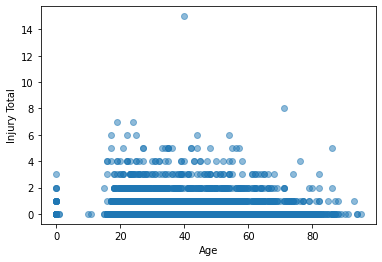

In [ ]:
import matplotlib.pyplot as plt

# Filter the data to include only drivers
drivers = merged_df[merged_df['person_type'] == 'DRIVER']

# Set the size of the random sample
sample_size = 10000

# Create a random sample of data points
drivers = drivers.sample(n=sample_size, random_state=1)

# Create a scatterplot of age and injuries_total
plt.scatter(drivers['age'], drivers['injuries_total'], alpha=0.5)

# Set axis labels
plt.xlabel('Age')
plt.ylabel('Injury Total')

# Show the plot
plt.show()

### Bar Chart

We want to investigate how the weather condition affect the severity of the injuries in the crashes. Therefore, it would be useful to look at the severity or classification of injury in each weather condition. In this chart, the x axis represents the weather conditions, and the y axis shows the number of different level of injuries.

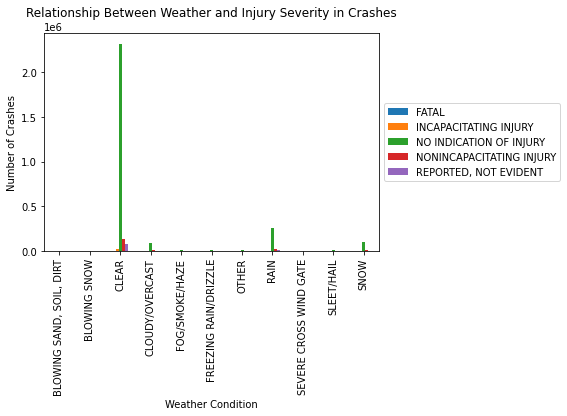

In [ ]:
import matplotlib.pyplot as plt

# Group the data by weather condition and injury severity
grouped_df = merged_df.groupby(['weather_condition', 'injury_classification']).size().unstack()

# Create the bar chart
ax = grouped_df.plot(kind='bar')

# Add axis labels and a title
plt.xlabel('Weather Condition')
plt.ylabel('Number of Crashes')
plt.title('Relationship Between Weather and Injury Severity in Crashes')

# Move the legend outside the chart
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

### Stacked Bar Chart

From the previous bar chart, we can see that the clear weather conditions have the highest number of crashes and relatively higher number of injuries. It might not be very useful to compare the absolute values of different type of injuries because clear weather conditions happen the most often. Moreover, it is not the most effective way to demonstrate the relationship between weather and injury severity. By normalizing the level of injuries relative to the number of crashes, the stacked bar chart allows for better comparison between different weather conditions.

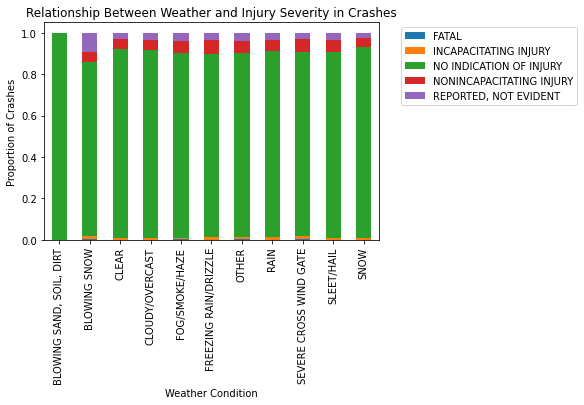

In [ ]:
# Calculate the total number of crashes for each weather condition
total_df = grouped_df.sum(axis=1)

# Calculate the proportion of crashes with each level of injury severity for each weather condition
prop_df = grouped_df.divide(total_df, axis=0)

# Create the stacked bar chart
prop_df.plot(kind='bar', stacked=True)

# Add axis labels and a title
plt.xlabel('Weather Condition')
plt.ylabel('Proportion of Crashes')
plt.title('Relationship Between Weather and Injury Severity in Crashes')

# Move the legend to the upper left
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

## Verifying
As the last step, let's verify that our dataset looks workable now and that all the changes had their intended effects. 

In [ ]:
#First, let's make sure that everything looks like we want by taking random sample and investigating it manually
merged_df.sample(50)

,crash_record_id,crash_date,device_condition,weather_condition,lighting_condition,crash_type,damage,injuries_total,injuries_fatal,injuries_incapacitating,...,age,safety_equipment,airbag_deployed,injury_classification,vehicle_id,make,model,vehicle_year,vehicle_type,make_model
348657,8dd2b2c668f371d2c0f1f640bfbc214a3c122c2c36d1f7...,2018-04-29 15:04:00,NO CONTROLS,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",0.0,0.0,0.0,...,28.0,None,DID NOT DEPLOY,NO INDICATION OF INJURY,360761.0,CHEVROLET,ASTRO,1970-01-01 00:00:00.000001999,VAN/MINI-VAN,CHEVROLET ASTRO
340357,4a00c21366e81be649854d40933909f57cef426a3a9459...,2019-08-26 10:05:00,NO CONTROLS,RAIN,DAYLIGHT,NO INJURY / DRIVE AWAY,$500 OR LESS,0.0,0.0,0.0,...,51.0,SAFETY BELT USED,None,NO INDICATION OF INJURY,688939.0,VOLVO,XC90,1970-01-01 00:00:00.000002012,PASSENGER,VOLVO XC90
2811938,f2109f9c7fcb2f275d0c4efecdf326187fa4f837afbf30...,2021-06-04 22:30:00,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",NO INJURY / DRIVE AWAY,"$501 - $1,500",0.0,0.0,0.0,...,NaN,None,DID NOT DEPLOY,NO INDICATION OF INJURY,1053251.0,FORD,FUSION,1970-01-01 00:00:00.000002019,PASSENGER,FORD FUSION
1818546,98a9b657ae75de91c3e01338513cac34eb20f80d0ad385...,2020-03-04 21:16:00,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",NO INJURY / DRIVE AWAY,$500 OR LESS,0.0,0.0,0.0,...,NaN,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,811899.0,CHEVROLET,MALIBU (CHEVELLE),1970-01-01 00:00:00.000002016,PASSENGER,CHEVROLET MALIBU (CHEVELLE)
2875033,f79e855d00c11ac0566818620e29070b244c1824707df9...,2020-11-25 07:00:00,NO CONTROLS,RAIN,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",5.0,0.0,0.0,...,27.0,SAFETY BELT USED,None,NONINCAPACITATING INJURY,947231.0,TOYOTA,PRIUS,1970-01-01 00:00:00.000002010,PASSENGER,TOYOTA PRIUS
2473922,d383ad8bdbc7ee7531c8bda3b8e7f738cb0ab6fbe183bc...,2019-03-29 22:53:00,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",NO INJURY / DRIVE AWAY,"OVER $1,500",0.0,0.0,0.0,...,57.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,585325.0,CADILLAC,None,1970-01-01 00:00:00.000002007,PASSENGER,NaN
1038165,3acdd8b476a802161af9d70678bcb757902d3a9ccf6d0c...,2018-05-09 18:30:00,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,"OVER $1,500",0.0,0.0,0.0,...,55.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,368166.0,CADILLAC,None,1970-01-01 00:00:00.000002013,PASSENGER,NaN
91096,7e0149ae2ea7109e4fd685320dbbb3347f7522c492f09b...,2019-06-28 15:20:00,NO CONTROLS,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,"OVER $1,500",0.0,0.0,0.0,...,48.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,648348.0,FORD,TAURUS,1970-01-01 00:00:00.000002017,PASSENGER,FORD TAURUS
3103069,8936452b523e0ab796215620d494d6506e492ef6abe538...,2020-05-26 21:30:00,NO CONTROLS,CLEAR,DARKNESS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",0.0,0.0,0.0,...,5.0,SAFETY BELT USED,None,NO INDICATION OF INJURY,880167.0,JEEP,COMPASS,1970-01-01 00:00:00.000002017,PASSENGER,JEEP COMPASS
222497,8573e77f10e36b51daf8ee22f1d601f60bf1b993052144...,2019-01-15 08:05:00,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,$500 OR LESS,0.0,0.0,0.0,...,40.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,537922.0,"PREVOST CAR, BUS, SAINTE CLAIRE, QUEBEC","PREVOST CAR, (""PREVOST BUS;"" SAINTE CLAIRE, QU...",1970-01-01 00:00:00.000002016,BUS OVER 15 PASS.,"PREVOST CAR, BUS, SAINTE CLAIRE, QUEBEC PREVOS..."


In [ ]:
#Let's see how many rows and columns we have as a final result
merged_df.shape

(3199776, 27)

## Writing the Data
After the manupulations, we want to save it for use in the future. We want to store the final dataset to a csv(comma seperated values) file.


In [ ]:
# Define the output directory and file name
output_directory = "/ADS_Milestone1/"
filename = 'final.csv'

# Create the directory if it does not exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Save the DataFrame as a CSV file
merged_df.to_csv("/content/drive/MyDrive/ADS_Milestone1/final.csv", index=False)